# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [2]:
from unityagents import UnityEnvironment
import numpy as np

import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [3]:
env = UnityEnvironment(file_name="./Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))
print("agents   ", env_info.agents)
# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
agents    [776]
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [6]:
from dqn_agent import Agent

agent = Agent(state_size=37, action_size=4, seed=0)

Episode 100	Average Score: 0.76
Episode 200	Average Score: 4.05
Episode 300	Average Score: 7.49
Episode 400	Average Score: 10.51
Episode 500	Average Score: 12.42
Episode 542	Average Score: 13.01
Environment solved in 442 episodes!	Average Score: 13.01
Episode 543	Average Score: 13.02
Environment solved in 443 episodes!	Average Score: 13.02
Episode 544	Average Score: 13.04
Environment solved in 444 episodes!	Average Score: 13.04
Episode 545	Average Score: 13.09
Environment solved in 445 episodes!	Average Score: 13.09
Episode 546	Average Score: 13.00
Environment solved in 446 episodes!	Average Score: 13.00
Episode 558	Average Score: 13.09
Environment solved in 458 episodes!	Average Score: 13.09
Episode 560	Average Score: 13.06
Environment solved in 460 episodes!	Average Score: 13.06
Episode 561	Average Score: 13.12
Environment solved in 461 episodes!	Average Score: 13.12
Episode 562	Average Score: 13.18
Environment solved in 462 episodes!	Average Score: 13.18
Episode 563	Average Score: 1

Episode 644	Average Score: 13.87
Environment solved in 544 episodes!	Average Score: 13.87
Episode 645	Average Score: 13.85
Environment solved in 545 episodes!	Average Score: 13.85
Episode 646	Average Score: 13.85
Environment solved in 546 episodes!	Average Score: 13.85
Episode 647	Average Score: 13.78
Environment solved in 547 episodes!	Average Score: 13.78
Episode 648	Average Score: 13.81
Environment solved in 548 episodes!	Average Score: 13.81
Episode 649	Average Score: 13.83
Environment solved in 549 episodes!	Average Score: 13.83
Episode 650	Average Score: 13.91
Environment solved in 550 episodes!	Average Score: 13.91
Episode 651	Average Score: 13.94
Environment solved in 551 episodes!	Average Score: 13.94
Episode 652	Average Score: 13.97
Environment solved in 552 episodes!	Average Score: 13.97
Episode 653	Average Score: 13.97
Environment solved in 553 episodes!	Average Score: 13.97
Episode 654	Average Score: 13.88
Environment solved in 554 episodes!	Average Score: 13.88
Episode 65

Episode 736	Average Score: 14.28
Environment solved in 636 episodes!	Average Score: 14.28
Episode 737	Average Score: 14.17
Environment solved in 637 episodes!	Average Score: 14.17
Episode 738	Average Score: 14.22
Environment solved in 638 episodes!	Average Score: 14.22
Episode 739	Average Score: 14.19
Environment solved in 639 episodes!	Average Score: 14.19
Episode 740	Average Score: 14.18
Environment solved in 640 episodes!	Average Score: 14.18
Episode 741	Average Score: 14.11
Environment solved in 641 episodes!	Average Score: 14.11
Episode 742	Average Score: 14.05
Environment solved in 642 episodes!	Average Score: 14.05
Episode 743	Average Score: 14.06
Environment solved in 643 episodes!	Average Score: 14.06
Episode 744	Average Score: 14.01
Environment solved in 644 episodes!	Average Score: 14.01
Episode 745	Average Score: 13.93
Environment solved in 645 episodes!	Average Score: 13.93
Episode 746	Average Score: 13.96
Environment solved in 646 episodes!	Average Score: 13.96
Episode 74

Episode 828	Average Score: 14.44
Environment solved in 728 episodes!	Average Score: 14.44
Episode 829	Average Score: 14.34
Environment solved in 729 episodes!	Average Score: 14.34
Episode 830	Average Score: 14.38
Environment solved in 730 episodes!	Average Score: 14.38
Episode 831	Average Score: 14.39
Environment solved in 731 episodes!	Average Score: 14.39
Episode 832	Average Score: 14.41
Environment solved in 732 episodes!	Average Score: 14.41
Episode 833	Average Score: 14.44
Environment solved in 733 episodes!	Average Score: 14.44
Episode 834	Average Score: 14.43
Environment solved in 734 episodes!	Average Score: 14.43
Episode 835	Average Score: 14.43
Environment solved in 735 episodes!	Average Score: 14.43
Episode 836	Average Score: 14.35
Environment solved in 736 episodes!	Average Score: 14.35
Episode 837	Average Score: 14.46
Environment solved in 737 episodes!	Average Score: 14.46
Episode 838	Average Score: 14.37
Environment solved in 738 episodes!	Average Score: 14.37
Episode 83

Episode 920	Average Score: 14.30
Environment solved in 820 episodes!	Average Score: 14.30
Episode 921	Average Score: 14.27
Environment solved in 821 episodes!	Average Score: 14.27
Episode 922	Average Score: 14.31
Environment solved in 822 episodes!	Average Score: 14.31
Episode 923	Average Score: 14.36
Environment solved in 823 episodes!	Average Score: 14.36
Episode 924	Average Score: 14.29
Environment solved in 824 episodes!	Average Score: 14.29
Episode 925	Average Score: 14.26
Environment solved in 825 episodes!	Average Score: 14.26
Episode 926	Average Score: 14.21
Environment solved in 826 episodes!	Average Score: 14.21
Episode 927	Average Score: 14.24
Environment solved in 827 episodes!	Average Score: 14.24
Episode 928	Average Score: 14.26
Environment solved in 828 episodes!	Average Score: 14.26
Episode 929	Average Score: 14.36
Environment solved in 829 episodes!	Average Score: 14.36
Episode 930	Average Score: 14.31
Environment solved in 830 episodes!	Average Score: 14.31
Episode 93

Episode 1011	Average Score: 15.31
Environment solved in 911 episodes!	Average Score: 15.31
Episode 1012	Average Score: 15.23
Environment solved in 912 episodes!	Average Score: 15.23
Episode 1013	Average Score: 15.27
Environment solved in 913 episodes!	Average Score: 15.27
Episode 1014	Average Score: 15.33
Environment solved in 914 episodes!	Average Score: 15.33
Episode 1015	Average Score: 15.28
Environment solved in 915 episodes!	Average Score: 15.28
Episode 1016	Average Score: 15.32
Environment solved in 916 episodes!	Average Score: 15.32
Episode 1017	Average Score: 15.43
Environment solved in 917 episodes!	Average Score: 15.43
Episode 1018	Average Score: 15.43
Environment solved in 918 episodes!	Average Score: 15.43
Episode 1019	Average Score: 15.36
Environment solved in 919 episodes!	Average Score: 15.36
Episode 1020	Average Score: 15.31
Environment solved in 920 episodes!	Average Score: 15.31
Episode 1021	Average Score: 15.41
Environment solved in 921 episodes!	Average Score: 15.41

Episode 1102	Average Score: 15.84
Environment solved in 1002 episodes!	Average Score: 15.84
Episode 1103	Average Score: 15.91
Environment solved in 1003 episodes!	Average Score: 15.91
Episode 1104	Average Score: 15.90
Environment solved in 1004 episodes!	Average Score: 15.90
Episode 1105	Average Score: 15.87
Environment solved in 1005 episodes!	Average Score: 15.87
Episode 1106	Average Score: 15.88
Environment solved in 1006 episodes!	Average Score: 15.88
Episode 1107	Average Score: 15.77
Environment solved in 1007 episodes!	Average Score: 15.77
Episode 1108	Average Score: 15.83
Environment solved in 1008 episodes!	Average Score: 15.83
Episode 1109	Average Score: 15.82
Environment solved in 1009 episodes!	Average Score: 15.82
Episode 1110	Average Score: 15.90
Environment solved in 1010 episodes!	Average Score: 15.90
Episode 1111	Average Score: 15.74
Environment solved in 1011 episodes!	Average Score: 15.74
Episode 1112	Average Score: 15.79
Environment solved in 1012 episodes!	Average S

Episode 1192	Average Score: 14.90
Environment solved in 1092 episodes!	Average Score: 14.90
Episode 1193	Average Score: 14.90
Environment solved in 1093 episodes!	Average Score: 14.90
Episode 1194	Average Score: 14.80
Environment solved in 1094 episodes!	Average Score: 14.80
Episode 1195	Average Score: 14.81
Environment solved in 1095 episodes!	Average Score: 14.81
Episode 1196	Average Score: 14.76
Environment solved in 1096 episodes!	Average Score: 14.76
Episode 1197	Average Score: 14.81
Environment solved in 1097 episodes!	Average Score: 14.81
Episode 1198	Average Score: 14.80
Environment solved in 1098 episodes!	Average Score: 14.80
Episode 1199	Average Score: 14.78
Environment solved in 1099 episodes!	Average Score: 14.78
Episode 1200	Average Score: 14.72

Environment solved in 1100 episodes!	Average Score: 14.72
Episode 1201	Average Score: 14.74
Environment solved in 1101 episodes!	Average Score: 14.74
Episode 1202	Average Score: 14.69
Environment solved in 1102 episodes!	Average 

Episode 1282	Average Score: 15.44
Environment solved in 1182 episodes!	Average Score: 15.44
Episode 1283	Average Score: 15.39
Environment solved in 1183 episodes!	Average Score: 15.39
Episode 1284	Average Score: 15.39
Environment solved in 1184 episodes!	Average Score: 15.39
Episode 1285	Average Score: 15.39
Environment solved in 1185 episodes!	Average Score: 15.39
Episode 1286	Average Score: 15.37
Environment solved in 1186 episodes!	Average Score: 15.37
Episode 1287	Average Score: 15.39
Environment solved in 1187 episodes!	Average Score: 15.39
Episode 1288	Average Score: 15.44
Environment solved in 1188 episodes!	Average Score: 15.44
Episode 1289	Average Score: 15.49
Environment solved in 1189 episodes!	Average Score: 15.49
Episode 1290	Average Score: 15.50
Environment solved in 1190 episodes!	Average Score: 15.50
Episode 1291	Average Score: 15.39
Environment solved in 1191 episodes!	Average Score: 15.39
Episode 1292	Average Score: 15.35
Environment solved in 1192 episodes!	Average S

Episode 1372	Average Score: 15.92
Environment solved in 1272 episodes!	Average Score: 15.92
Episode 1373	Average Score: 15.86
Environment solved in 1273 episodes!	Average Score: 15.86
Episode 1374	Average Score: 15.86
Environment solved in 1274 episodes!	Average Score: 15.86
Episode 1375	Average Score: 15.88
Environment solved in 1275 episodes!	Average Score: 15.88
Episode 1376	Average Score: 15.91
Environment solved in 1276 episodes!	Average Score: 15.91
Episode 1377	Average Score: 15.89
Environment solved in 1277 episodes!	Average Score: 15.89
Episode 1378	Average Score: 15.94
Environment solved in 1278 episodes!	Average Score: 15.94
Episode 1379	Average Score: 15.99
Environment solved in 1279 episodes!	Average Score: 15.99
Episode 1380	Average Score: 15.95
Environment solved in 1280 episodes!	Average Score: 15.95
Episode 1381	Average Score: 15.99
Environment solved in 1281 episodes!	Average Score: 15.99
Episode 1382	Average Score: 15.98
Environment solved in 1282 episodes!	Average S

Episode 1462	Average Score: 16.43
Environment solved in 1362 episodes!	Average Score: 16.43
Episode 1463	Average Score: 16.42
Environment solved in 1363 episodes!	Average Score: 16.42
Episode 1464	Average Score: 16.42
Environment solved in 1364 episodes!	Average Score: 16.42
Episode 1465	Average Score: 16.39
Environment solved in 1365 episodes!	Average Score: 16.39
Episode 1466	Average Score: 16.24
Environment solved in 1366 episodes!	Average Score: 16.24
Episode 1467	Average Score: 16.20
Environment solved in 1367 episodes!	Average Score: 16.20
Episode 1468	Average Score: 16.17
Environment solved in 1368 episodes!	Average Score: 16.17
Episode 1469	Average Score: 16.15
Environment solved in 1369 episodes!	Average Score: 16.15
Episode 1470	Average Score: 16.18
Environment solved in 1370 episodes!	Average Score: 16.18
Episode 1471	Average Score: 16.33
Environment solved in 1371 episodes!	Average Score: 16.33
Episode 1472	Average Score: 16.31
Environment solved in 1372 episodes!	Average S

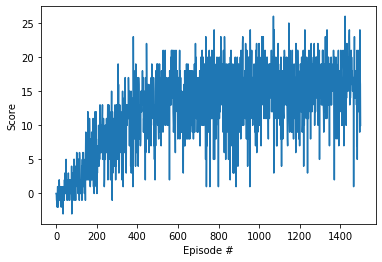

In [7]:
def dqn(n_episodes=1500, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        #state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            #next_state, reward, done, _ = env_info.step(action)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode hsdaas finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [8]:
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
print("state", state)
score = 0                                          # initialize the score
while True:
    #action = np.random.randint(action_size)        # select an action
    action = agent.act(state)
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode hsdaas finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

state [0.         0.         0.         1.         0.         0.
 1.         0.         0.         0.30404615 0.         1.
 0.         0.         0.25590453 0.         0.         1.
 0.         0.51311326 0.         1.         0.         0.
 0.22626038 0.         0.         1.         0.         0.14326201
 0.         0.         1.         0.         0.11781893 0.
 0.        ]
Score: 17.0


When finished, you can close the environment.

In [9]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```